In [29]:
import pandas as pd
import numpy as np
import os, pdb, sys
from sklearn.ensemble import IsolationForest as IF
import matplotlib.pyplot as plt

df = pd.read_csv('prepared_data_pca.csv')
df.head()

,yr,state,county,key,animal_expense_div_by_animal_sales,pct_animal_sales,pct_crop_sales,pct_acres_insured,pct_sales_ccc_loans,pct_acres_irrigated,pct_acres_fertilized,pct_acres_conserved,pct_acres_operated,pct_ops_w_gov_programs,expense_ratio,expenses_div_net_income,pc1,pc2,pc3
0,2022,ALABAMA,AUTAUGA,2022-1-1,0.106975,0.266951,0.733049,0.046056,0.000000,0.006419,0.071392,0.003183,0.000928,0.000296,0.765847,2.933109,-1.107063,-0.199252,0.205935
1,2022,ALABAMA,BULLOCK,2022-1-11,0.253548,0.227659,0.772341,0.028264,0.000000,0.004604,0.017742,0.008083,0.000627,0.000145,0.810231,2.494467,-0.668419,-0.149610,0.246780
2,2022,ALABAMA,DALLAS,2022-1-47,0.131701,0.481254,0.518733,0.076939,0.018957,0.013059,0.078542,0.009153,0.000635,0.000416,0.858194,4.149103,-2.323058,-0.097618,-0.054381
3,2022,ALABAMA,ELMORE,2022-1-51,0.137465,0.159392,0.840608,0.059423,0.000000,0.007587,0.080664,0.003004,0.001208,0.000375,0.993232,12.567907,-10.741843,0.021050,0.368948
4,2022,ALABAMA,GREENE,2022-1-63,0.084918,0.915756,0.084244,0.012574,0.000000,0.000140,0.011881,0.002806,0.000587,0.000241,0.961819,8.775328,-6.949284,0.036665,-0.649799


In [30]:
# Define Columns
cols = df.columns[4:-3]
pca = df.columns[-3:]

# Isolation Forest

In [31]:
results = {} 
for yr in set(df['yr']): 
    sub = df[df['yr'] == yr].reset_index(drop = True)
    clf = IF(random_state=0, max_samples=100).fit(sub[cols].fillna(0))
    sub['IF_score_cols'] = clf.decision_function(sub[cols].fillna(0))

    clf = IF(random_state=0, max_samples=100).fit(sub[pca])
    sub['IF_score_pca'] = clf.decision_function(sub[pca])

    results[str(yr)] = sub

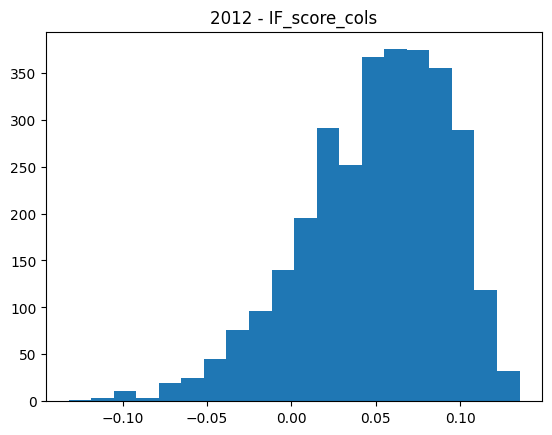

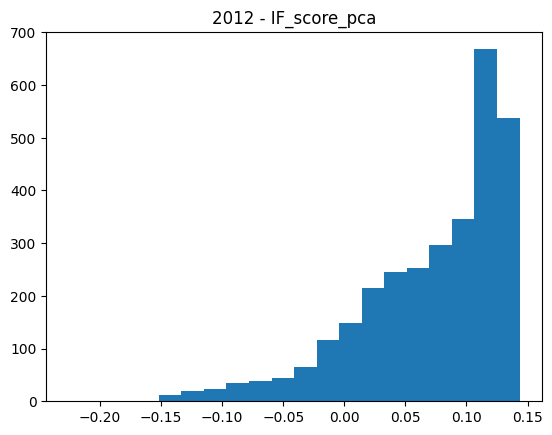

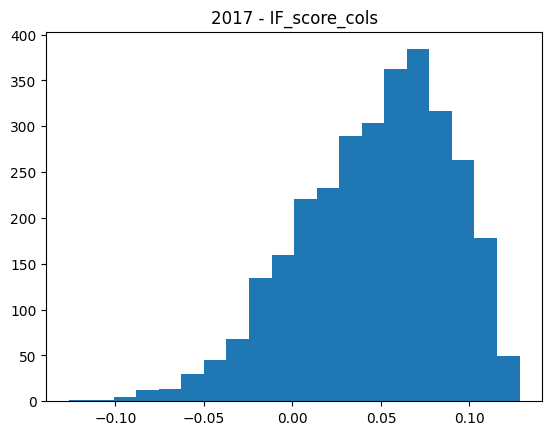

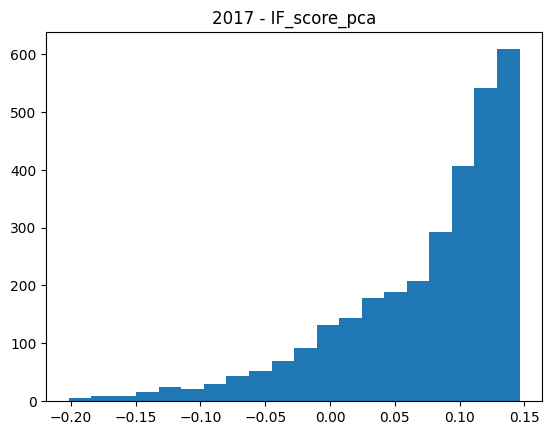

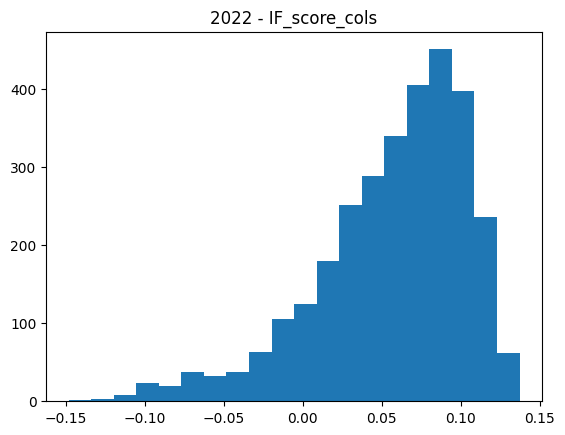

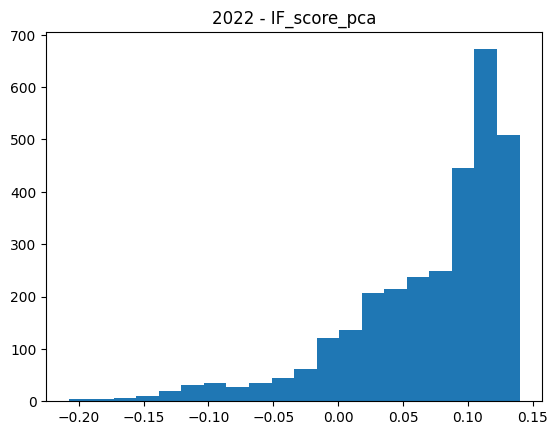

In [33]:
res_cols = ['IF_score_cols', 'IF_score_pca']
yrs = ['2012', '2017', '2022']
for yr in yrs: 
    for res in res_cols: 
        tmp = results[yr]
        plt.hist(tmp[res], bins = 20)
        plt.title(yr + ' - ' + res)
        plt.show()
        plt.close()